In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [16]:
# 1. Load Data
df = pd.read_csv('df_final_features.csv')

C:\Users\rahal\AppData\Local\Temp\ipykernel_8240\387093226.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_final_features.csv')


In [ ]:
# 2. Define "Success" (Target Variable)
# A product is a "Success" if Rating > 4.2 (High Satisfaction)
# We handle the mixed scale (0-5 and 0-10) by normalizing

df['Rating_Clean'] = pd.to_numeric(df['Rating Value'], errors='coerce')
df['Rating_Clean'] = df['Rating_Clean'].apply(lambda x: x/2 if x > 5 else x)
df.dropna(subset=['Rating_Clean'], inplace=True)

# Target: 1 = Hit (Rating >= 4.2), 0 = Average
df['Is_Success'] = (df['Rating_Clean'] >= 4.2).astype(int)

In [ ]:
# 3. Create Features for the Model

# Feature: Is it Oud?
df['Is_Oud'] = df['Main Accords'].astype(str).str.lower().apply(lambda x: 1 if 'oud' in x else 0)

# Feature: Is it Natural/Green?
df['Is_Natural'] = df['Main Accords'].astype(str).str.lower().apply(lambda x: 1 if 'green' in x or 'herbal' in x else 0)

# Feature: Longevity Score (Map text to numbers)
longevity_map = {
    'weak': 1, 'intimate': 1,
    'moderate': 2, 
    'strong': 3, 'long lasting': 3, 
    'eternal': 4, 'very long lasting': 4
}
df['Longevity_Score'] = df['longevity'].astype(str).str.lower().map(longevity_map).fillna(2)

# Feature: Social Scores (Handle missing values with mean)
df['Universal_Influencer_Score'] = df['Universal_Influencer_Score'].fillna(df['Universal_Influencer_Score'].mean())
df['Overall_Purchase_Intent_Score'] = df['Overall_Purchase_Intent_Score'].fillna(df['Overall_Purchase_Intent_Score'].mean())


In [19]:
# 4. Train the Random Forest Model
features = ['Is_Oud', 'Is_Natural', 'Longevity_Score', 'Universal_Influencer_Score', 'Overall_Purchase_Intent_Score']
X = df[features]
y = df['Is_Success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# 5. Evaluate
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"--- Model Accuracy: {acc:.2%} ---")

--- Model Accuracy: 71.49% ---


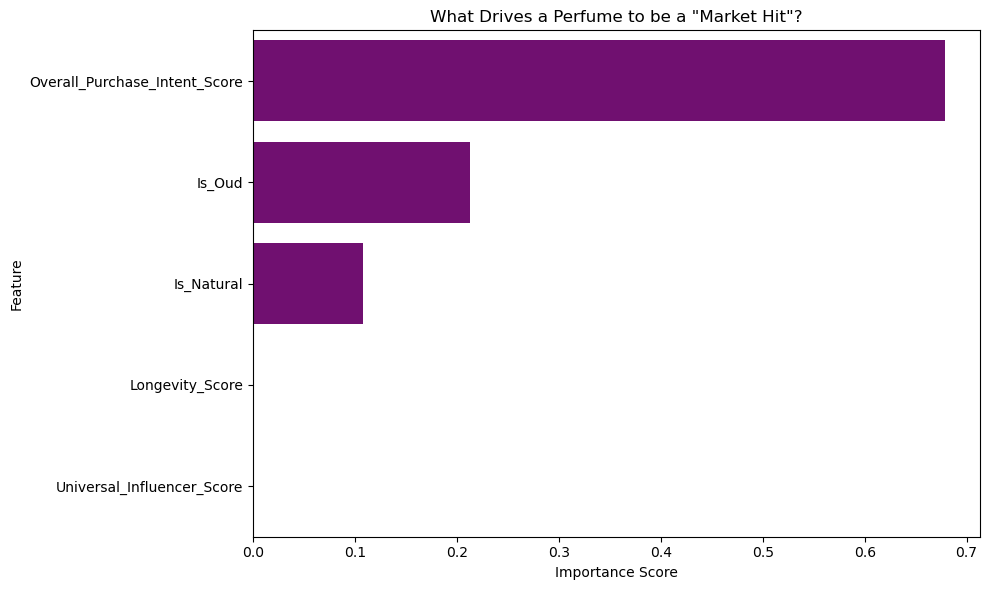


Top Drivers of Success:
                         Feature  Importance
4  Overall_Purchase_Intent_Score    0.679140
0                         Is_Oud    0.212803
1                     Is_Natural    0.108058
2                Longevity_Score    0.000000
3     Universal_Influencer_Score    0.000000


In [ ]:
# 6. Visualize Feature Importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, color= 'purple')
plt.title('What Drives a Perfume to be a "Market Hit"?')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Print the table for you to read
print("\nTop Drivers of Success:")
print(importance_df)

In [22]:
df

,Product_ID,brand_clean,type_clean,longevity,Main Accords,Rating Value,Rating Count,Overall_Purchase_Intent_Score,Universal_Influencer_Score,Rating_Clean,Is_Success,Is_Oud,Is_Natural,Longevity_Score
933,9am afnanfor women,NaN,NaN,NaN,"['citrus', 'musky', 'woody', 'aromatic', 'warm...",3.73,174.0,3.445706,2.603518,3.73,0,0,0,2.0
934,9am dive afnanfor women and men,NaN,NaN,NaN,"['fruity', 'woody', 'green', 'warm spicy', 'ar...",4.29,842.0,3.298940,2.603518,4.29,1,0,1,2.0
935,9am pour femme afnanfor women,NaN,NaN,NaN,"['fruity', 'musky', 'amber', 'citrus', 'powder...",4.00,68.0,3.445706,2.603518,4.00,0,0,0,2.0
936,9pm afnanfor men,NaN,NaN,NaN,"['vanilla', 'amber', 'warm spicy', 'cinnamon',...",4.50,6865.0,3.152174,2.603518,4.50,1,0,0,2.0
937,9pm pour femme afnanfor women,NaN,NaN,NaN,"['woody', 'aromatic', 'rose', 'fruity', 'powde...",3.49,63.0,3.445706,2.603518,3.49,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66866,zen gold elixir shiseido / 資生堂 2013 eau de par...,shiseido / 資生堂,eau de parfum absolue,NaN,"['bergamot', 'grapefruit', 'pineapple', 'peach...",8.10,61.0,3.333171,2.603518,4.05,0,0,0,2.0
66867,zen shiseido / 資生堂 1964 eau de cologne,shiseido / 資生堂,eau de cologne,NaN,"['bergamot', 'galbanum', 'hyacinth', 'orange b...",7.40,32.0,3.333171,2.603518,3.70,0,0,0,2.0
66868,zen shiseido / 資生堂 2000 eau de parfum aromatique,shiseido / 資生堂,eau de parfum aromatique,NaN,"['hyacinth', 'gentiana scabra', 'valerian', 'i...",7.90,49.0,3.333171,2.603518,3.95,0,1,0,2.0
66869,zino davidoff 1986 after shave,davidoff,after shave,NaN,"['rosewood', 'lavender', 'bergamot', 'clary sa...",8.50,13.0,3.333171,2.603518,4.25,1,0,0,2.0


In [23]:
importance_df

,Feature,Importance
4,Overall_Purchase_Intent_Score,0.679140
0,Is_Oud,0.212803
1,Is_Natural,0.108058
2,Longevity_Score,0.000000
3,Universal_Influencer_Score,0.000000


In [24]:
# Export to Single-Sheet Excel File
with pd.ExcelWriter('perfume_success_analysis.xlsx') as writer:
    df.to_excel(writer, sheet_name='Perfume Data', index=False)
    importance_df.to_excel(writer, sheet_name='Feature Importance', index=False)
